In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from pylab import *  
# 显示汉字
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False

#配置绘图风格
plt.rcParams['axes.labelsize'] = 8.
plt.rcParams['xtick.labelsize'] = 12. 
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['legend.fontsize'] =12
plt.rcParams['figure.figsize'] = [8.,8.]


plt.rc('figure', figsize=(8, 5)) 
data= pd.read_csv( 'qgjobs.txt', delimiter=",")
data.head()


,ID,name,company,location,welfare,label,salaryMin,salaryMax,salaryMid,experience,education,companyType,companyLevel,companySize
0,1,数据分析师（电商）,未来集市,杭州·西溪,“电商独角兽、发展空间大，16-22薪”,电商 BI 数据分析,12,24,18.0,经验3-5年,本科,移动互联网,不需要融资,500-2000人
1,2,数据分析师,阿卡索外教网,深圳·国贸,“扁平管理，领导nice”,数据分析 数据运营,12,20,16.0,经验3-5年,本科,"教育,移动互联网",C轮,2000人以上
2,3,数据分析,麦子金服,上海·浦东新…,"“交通便利,领导好,水果提供,餐补”",数据运营,15,25,20.0,经验3-5年,本科,金融,A轮,500-2000人
3,4,数据分析师,mobike摩拜单车,北京·望京,“发展前景”,SQL BI 商业,15,25,20.0,经验3-5年,本科,汽车丨出行,D轮及以上,150-500人
4,5,数据分析师,杭州抖抖智能科技有限公司,杭州·西兴,“入职五险一金、双休、午餐、下午茶”,移动互联网 数据分析 SQL,6,10,8.0,经验1-3年,本科,"移动互联网,金融",不需要融资,50-150人


<function matplotlib.pyplot.show(*args, **kw)>

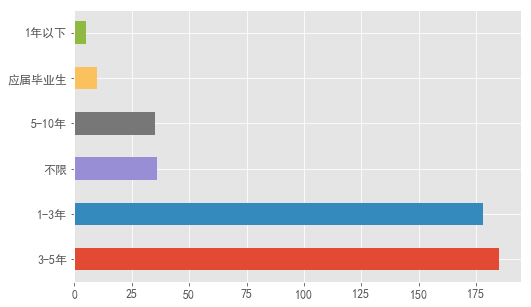

In [76]:
def remove_word(word):
    return word[2:]
data['experience']= data['experience'].apply(remove_word)
data['experience'].value_counts()
data['experience'].value_counts().plot(kind='barh')
plt.rc('figure', figsize=(8, 5)) 
plt.show

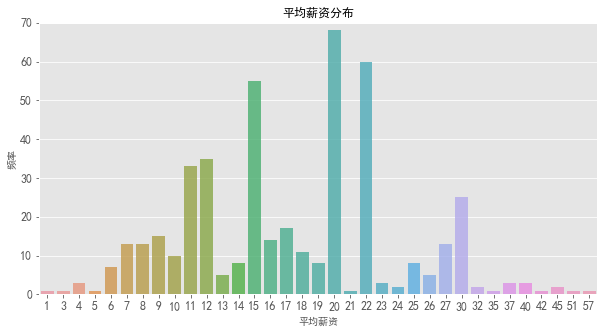

In [108]:
data['salaryMid'] = data['salaryMid'].astype(int)
salary =data.groupby(['salaryMid'])['salaryMid'].count()
ax = plt.figure(figsize=(10, 5)).add_subplot(111)
sns.barplot(salary.index,salary.values, alpha=0.8)
ax.set_ylim([0, 70])
ax.set_xlabel('平均薪资', fontsize=10)
ax.set_ylabel('频率', fontsize=10)
ax.set_title('平均薪资分布', size=12)

plt.show()

In [122]:
def remove_word(word):
    return word[:2]
da= data['location'].apply(remove_word)


Text(0.5,1,'不同城市数据分析职位数量')

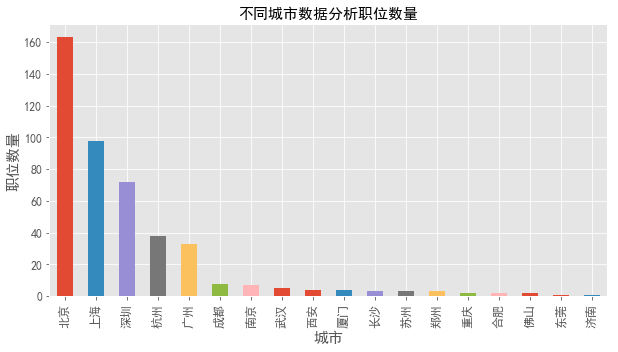

In [141]:
da.value_counts().plot(kind='bar')
plt.rc('figure', figsize=(10, 5)) 
plt.xlabel('城市', fontsize=15)
plt.ylabel('职位数量', fontsize=15)
plt.title('不同城市数据分析职位数量', fontsize=15)

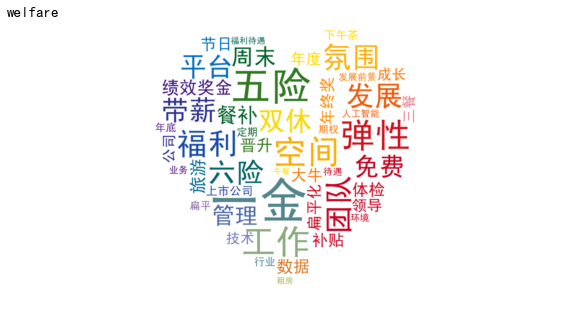

In [165]:
from collections import Counter
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text1 = ','.join([welfare for welfare in data['welfare']])
words_list1 = ' '.join(jieba.cut(text1, cut_all=False))
# print(words_list1)
font = 'C:/Users/a/CQJob/Simhei.ttf'
heart_coloring = np.array(Image.open('C:/Users/a/CQJob/heart.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("丨")
wc = WordCloud(background_color="white", collocations=False, font_path=font, width=4400, height=4400, margin=2, mask=heart_coloring,
                                    max_font_size=120, min_font_size=20).generate(words_list1)
image_colors = ImageColorGenerator(heart_coloring)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#plt.imshow(wc)
plt.title('welfare', fontsize=15,x=-0.02)
plt.axis("off")
plt.show()


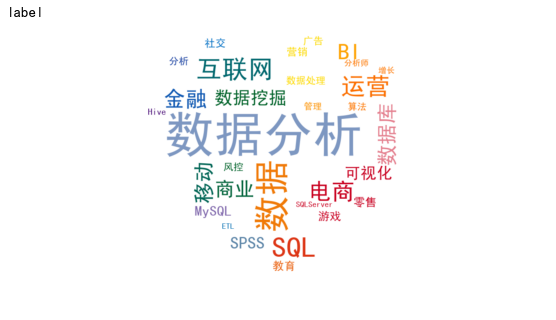

In [166]:
from collections import Counter
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text2 = ','.join([label for label in data['label']])
words_list2 = ' '.join(jieba.cut(text2, cut_all=False))

font = 'C:/Users/a/CQJob/Simhei.ttf'
heart_coloring = np.array(Image.open('C:/Users/a/CQJob/heart.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("丨")
wc = WordCloud(background_color="white", collocations=False, font_path=font, width=4400, height=4400, margin=2, mask=heart_coloring,
                                    max_font_size=120, min_font_size=20).generate(words_list2)
image_colors = ImageColorGenerator(heart_coloring)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#plt.imshow(wc)
plt.title('label', fontsize=15,x=-0.02)
plt.axis("off")
plt.show()

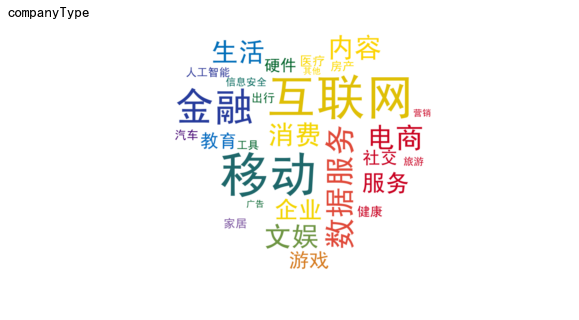

In [167]:
from collections import Counter
import jieba
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = ','.join([location for location in data['companyType']])
words_list = ' '.join(jieba.cut(text, cut_all=False))
font = 'C:/Users/a/CQJob/Simhei.ttf'
heart_coloring = np.array(Image.open('C:/Users/a/CQJob/heart.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("丨")
wc = WordCloud(background_color="white", collocations=False, font_path=font, width=4400, height=4400, margin=2, mask=heart_coloring,
                                    max_font_size=120, min_font_size=20).generate(words_list)
image_colors = ImageColorGenerator(heart_coloring)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
#plt.imshow(wc)
plt.title('companyType', fontsize=15,x=-0.02)
plt.axis("off")
plt.show()


In [2]:
from pyecharts import Map

def remove_word(word):
    return word[:2]
a = data['location'].apply(remove_word)
b = a.value_counts()
attr = b.index  
print(attr)
value = b.values
print(value)
map = Map("全国地图示例", width=500,height=360)  #设置大小
map.add("", attr, value, visual_range=[0, 170], maptype='china', is_visualmap=True,visual_text_color='#000')  #导入的国家
map.render('中国地图.html')

# # print(data6)
# geo = Geo("全国数据分析工资分布",  title_color="#fff", title_pos="center",width=1200, height=600, background_color='#404a59')

# #属性、数值对应的映射关系,attr是属性,value是该属性对应的数值，比如说北京对应15000，杭州对应10000
# attr, value =geo.cast(attr, value)

# #这个是对地图进行设置，第一个参数设置为空值，我看别人这么设置我也这么设置了，下次查查为什么，第二个参数是属性，第三个为对应数值，
# #第四个参数是可视范围,把工资区间换算成了0到300. 第五个很容易出错，我之前安装完地图还是出错的原因就是没加上maptype=''china',一定要加上，第六个图例类型写上热力图，
# #第七个参数是地图文本字体颜色为白色，第八个是标识大小，第九个是否进行可视化=True.
# geo.add("", attr, value, visual_range=[0, 200],maptype='china',type='heatmap' ,visual_text_color="#fff", symbol_size=15, is_visualmap=True)

# geo.show_confi
# # geo.render('我的图片.html')

Index(['北京', '上海', '深圳', '杭州', '广州', '成都', '南京', '武汉', '西安', '厦门', '长沙', '苏州',
       '郑州', '佛山', '合肥', '重庆', '东莞', '济南'],
      dtype='object')
[163  98  72  38  33   8   7   5   4   4   3   3   3   2   2   2   1   1]


In [26]:
value = [155, 10, 66, 78]
attr = ["崇明区", "金山区", "嘉定区", "普陀区"]
map = Map("上海地图示例", width=500,
height=360)
map.add("", attr, value, maptype='上海',
        is_visualmap=True,  #左边滑块的颜色调节
        visual_text_color='#000',#显示文本的颜色
        is_label_show=True)  #显示标签
map.render('上海省地图.html')

In [10]:
from pyecharts import Geo
geo = Geo("全国数据分析需求分布图", "data analysis", title_color="#fff", title_pos="center", width=1000, height=600, background_color='#404a59')

# type="effectScatter", is_random=True, effect_scale=5  使点具有发散性
geo.add("数据分析岗位需求数", attr, value, type="effectScatter", is_random=True, effect_scale=5, visual_range=[0, 170],visual_text_color="#fff", symbol_size=15, is_visualmap=True, is_roam=False)
geo.show_config()
geo.render("全国数据分析需求分布图.html")

{'_index_flag': 704110,
 'backgroundColor': '#404a59',
 'color': ['#749f83',
           '#ca8622',
           '#726930',
           '#bda29a',
           '#ac6767',
           '#ef5b9c',
           '#d48265',
           '#6e7074',
           '#b2d235',
           '#1d953f',
           '#905a3d',
           '#f05b72',
           '#6d8346',
           '#6950a1',
           '#918597',
           '#fab27b',
           '#f47920',
           '#c4ccd3',
           '#2f4554',
           '#61a0a8',
           '#444693',
           '#f6f5ec',
           '#546570',
           '#2a5caa',
           '#c23531'],
 'geo': {'itemStyle': {'emphasis': {'areaColor': '#2a333d'},
                       'normal': {'areaColor': '#323c48',
                                  'borderColor': '#111'}},
         'label': {},
         'map': 'china'},
 'legend': [{'data': ['数据分析岗位需求数'],
             'left': 'center',
             'orient': 'horizontal',
             'selectedMode': 'multiple',
             'show': Tr